In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bestsellers.csv')

In [4]:
# Get the first 5 rows of the spreadsheet
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [5]:
# Get the shape of the spreadsheet
print(df.shape)

(550, 7)


In [6]:
# Get the column names of the spreadsheet
print(df.columns)

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [7]:
# Get summary statistics for each column
print(df.describe())

       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.rename(columns={"Name": "Title", "Year": "Publication Year", "User Rating": "Rating"}, inplace=True)

In [10]:
df["Price"] = df["Price"].astype(float)

In [11]:
df

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8.0,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2018,Non Fiction


In [12]:
author_counts = df['Author'].value_counts()
print(author_counts)

Author
Jeff Kinney                           12
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
                                      ..
Maurice Sendak                         1
Cheryl Strayed                         1
The Staff of The Late Show with       1
Geneen Roth                            1
Ken Follett                            1
Name: count, Length: 248, dtype: int64


In [13]:
avg_rating_by_genre = df.groupby("Genre")["Rating"].mean()
print(avg_rating_by_genre)

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: Rating, dtype: float64


In [14]:
# Export top selling authors to a CSV file
author_counts.head(10).to_csv("top_authors.csv")

# Export average rating by genre to a CSV file
avg_rating_by_genre.to_csv("avg_rating_by_genre.csv")

In [15]:
avg_trend = df.groupby('Publication Year').agg({
    'Price': 'mean',
    'Rating': 'mean'
}).reset_index()

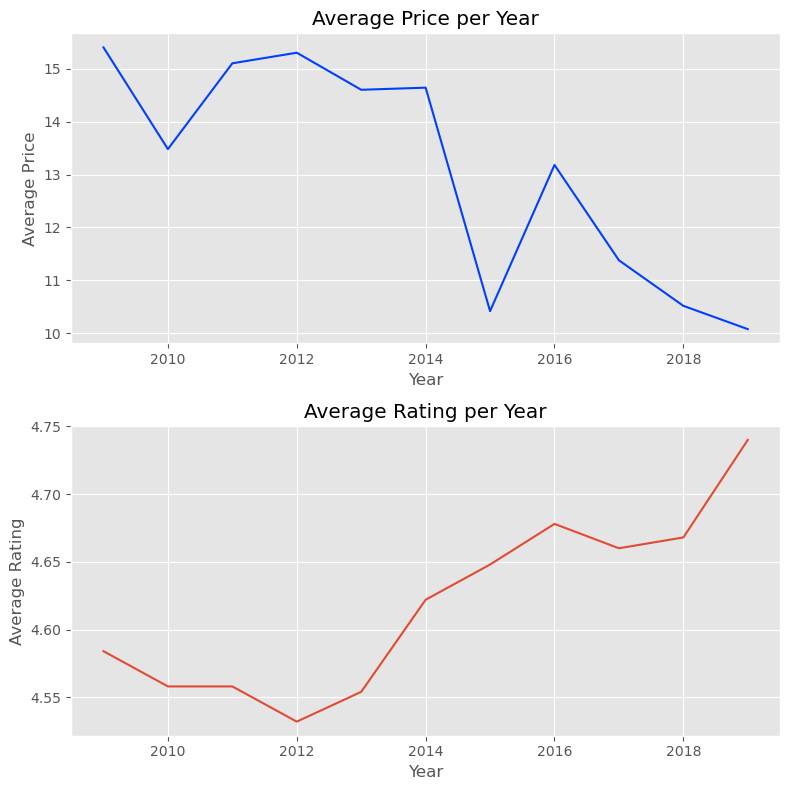

In [20]:
# Create figure with 2 vertical plots
plt.figure(figsize=(8, 8))

# Plot 1: Average Price per Year
plt.style.use("seaborn-v0_8-bright")
plt.subplot(2, 1, 1)
plt.plot(avg_trend['Publication Year'], avg_trend['Price'])
plt.title("Average Price per Year")
plt.xlabel("Year")
plt.ylabel("Average Price")

# Plot 2: Average Rating per Year
plt.style.use("ggplot")
plt.subplot(2, 1, 2)
plt.plot(avg_trend['Publication Year'], avg_trend['Rating'])
plt.title("Average Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")

plt.tight_layout()
plt.show()